In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [4]:
dimension = 50
rho0 = 5
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

In [5]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

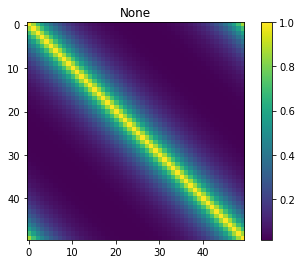

In [6]:
imshow(P)

10.420941070311047


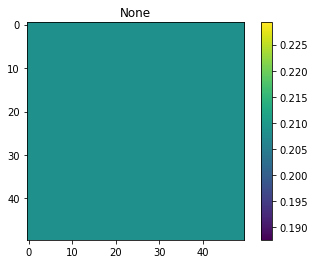

In [7]:
imshow((eig_val[0]*eig_vec[:, 0][:, None] @ eig_vec[:, 0][:, None].conj().T).real)
print(eig_val[0])

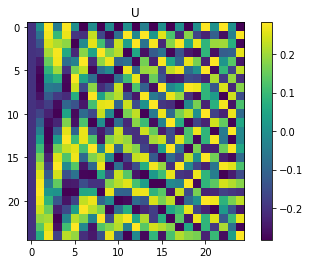

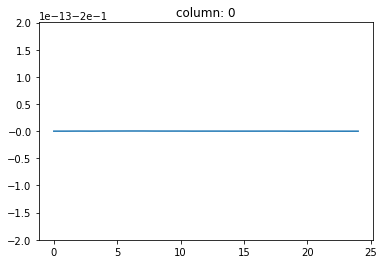

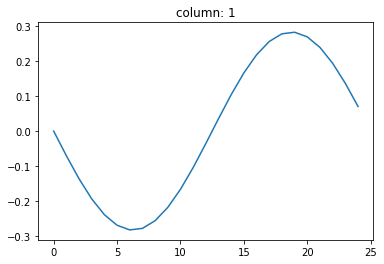

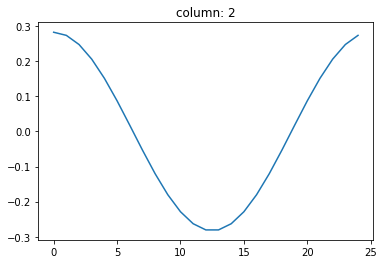

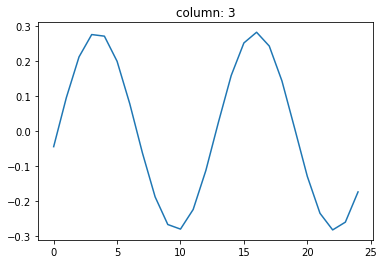

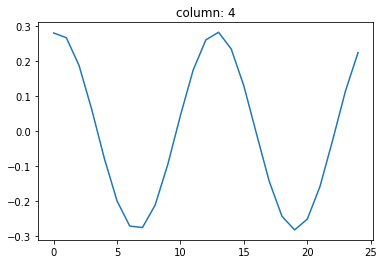

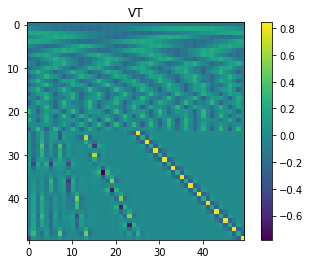

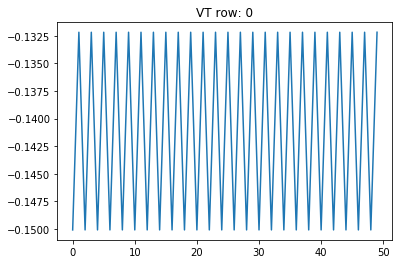

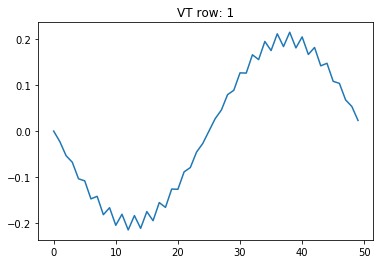

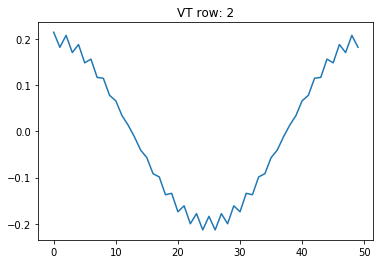

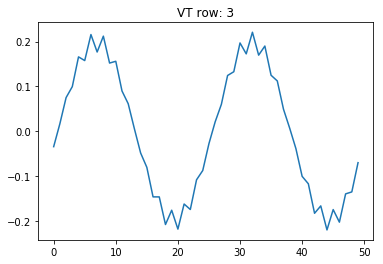

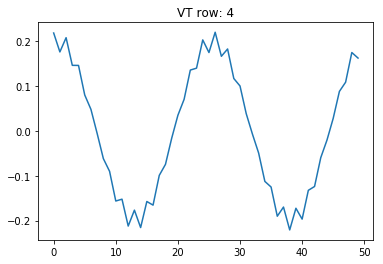

In [8]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}')

In [9]:
ens_size = int(1e5)
obs_size = int(1e3)

In [10]:
mu = np.zeros(dimension)
X_ens = assimilate.generate_ensemble(
    ens_size, mu, P_sqrt)
ground_truth = assimilate.generate_ensemble(
    1, mu, P_sqrt)
Y_ens = H @ ground_truth + R_sqrt @ np.random.randn(y_size, obs_size)

In [11]:
X_ens_p = Tx @ X_ens
Y_ens_p = Ty @ Y_ens

In [12]:
sigma=1000
# X_smooth = ndimage.gaussian_filter1d(
#     X_ens, sigma=sigma, axis=0, mode='wrap')
X_smooth = np.repeat(X_ens.mean(axis=0)[None, :], dimension, axis=0)

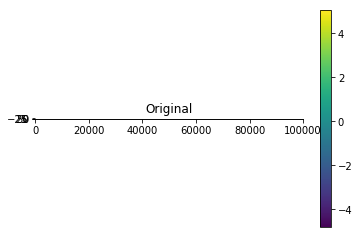

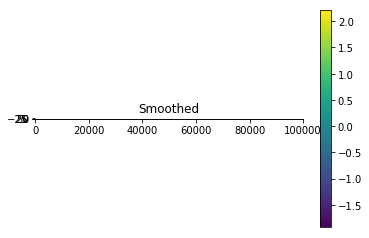

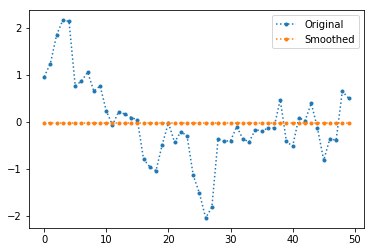

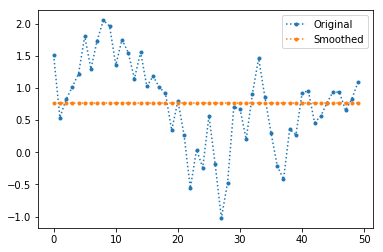

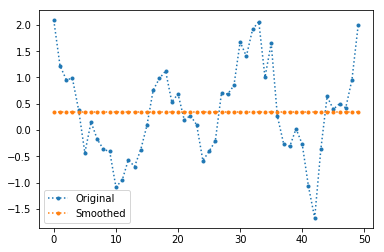

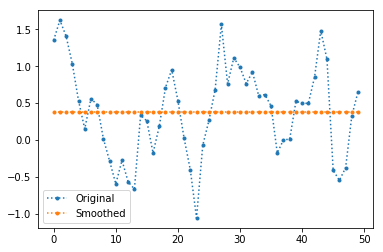

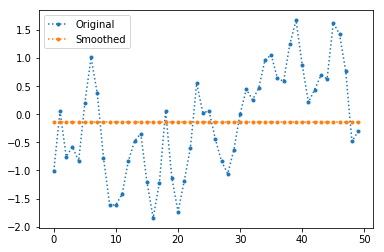

In [13]:
imshow(X_ens, 'Original')
imshow(X_smooth, 'Smoothed')

for ii in range(5):
    plt.figure()
    plt.plot(X_ens[:, ii], ':', marker='.')
    plt.plot(X_smooth[:, ii], ':', marker='.')
    plt.legend(['Original', 'Smoothed'])

In [14]:
np.var(X_smooth[0])

0.20919120929027038

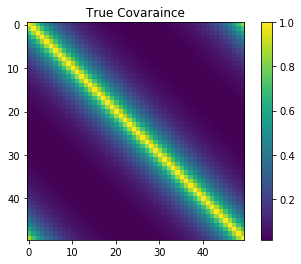

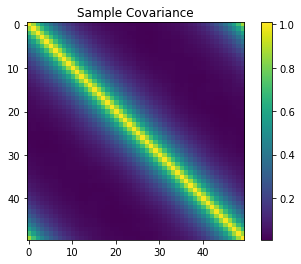

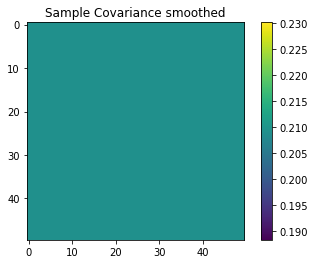

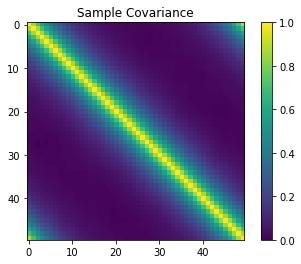

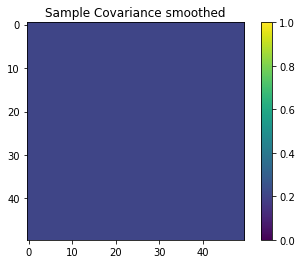

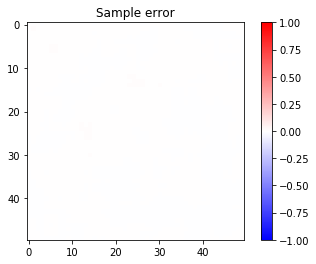

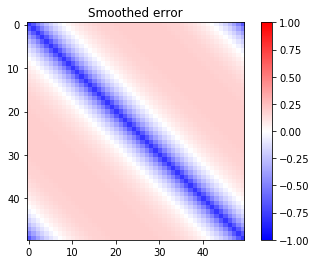

In [15]:
P_sample = np.cov(X_ens)
P_smooth = np.cov(X_smooth)
imshow(P, 'True Covaraince')

imshow(P_sample, 'Sample Covariance')
imshow(P_smooth, 'Sample Covariance smoothed')

imshow(P_sample, 'Sample Covariance', vmin=0, vmax=1)
imshow(P_smooth, 'Sample Covariance smoothed', vmin=0, vmax=1)

imshow(P_sample - P, 'Sample error', vmin=-1, vmax=1, cmap='bwr')
imshow(P_smooth - P, 'Smoothed error', vmin=-1, vmax=1, cmap='bwr')


In [16]:
eig_val[0] * 1/dimension

0.20841882140622092